In [1]:
# Part 1 - Building the CNN
# importing the Keras libraries and packages
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers


In [2]:

# Initialing the CNN
classifier = Sequential()

# Step 1 - Convolutio Layer
classifier.add(Convolution2D(
    32, (3,  3), input_shape=(64, 64, 3), activation='relu'))

# step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding second convolution layer
classifier.add(Convolution2D(32, (3,  3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding 3rd Concolution Layer
classifier.add(Convolution2D(64, (3,  3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))


In [3]:

# Step 3 - Flattening
classifier.add(Flatten())


In [4]:
# Step 4 - Full Connection
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation='softmax'))


In [19]:
# Compiling The CNN
classifier.compile(
    # optimizer=optimizers.SGD(lr=0.01),
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Part 2 Fittting the CNN to the image
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'mydata/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    'mydata/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

model = classifier.fit(
    training_set,
    steps_per_epoch=800,
    epochs=25,
    validation_data=test_set,
    # validation_steps=6500
)


Found 45500 images belonging to 26 classes.
Found 6500 images belonging to 26 classes.
Epoch 1/25
800/800 [==============================] - 83s 103ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0242 - val_accuracy: 0.9940
Epoch 2/25
800/800 [==============================] - 66s 82ms/step - loss: 0.0200 - accuracy: 0.9944 - val_loss: 0.0261 - val_accuracy: 0.9948
Epoch 3/25
800/800 [==============================] - 57s 72ms/step - loss: 0.0157 - accuracy: 0.9945 - val_loss: 0.0416 - val_accuracy: 0.9915
Epoch 4/25
800/800 [==============================] - 57s 71ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0189 - val_accuracy: 0.9949
Epoch 5/25
800/800 [==============================] - 69s 86ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0259 - val_accuracy: 0.9942
Epoch 6/25
800/800 [==============================] - 67s 84ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0291 - val_accuracy: 0.9946
Epoch 7/25
800/800 [============================

In [7]:

'''#Saving the model
import h5py
classifier.save('Trained_model.h5')'''


"#Saving the model\nimport h5py\nclassifier.save('Trained_model.h5')"

In [20]:
model.history

{'loss': [0.017716316506266594,
  0.019996101036667824,
  0.01574651710689068,
  0.01534885074943304,
  0.014699886552989483,
  0.01330216508358717,
  0.018753206357359886,
  0.016859717667102814,
  0.013165878131985664,
  0.01301900576800108,
  0.015039065852761269,
  0.012259448878467083,
  0.011969485320150852,
  0.014388778246939182,
  0.013078629970550537,
  0.008596356958150864,
  0.015190557576715946,
  0.011313953436911106,
  0.01247574295848608,
  0.009670663625001907,
  0.014400595799088478,
  0.011994391679763794,
  0.012332177720963955,
  0.013873868621885777,
  0.009602298028767109],
 'accuracy': [0.9945303797721863,
  0.9943740963935852,
  0.9945312738418579,
  0.9950390458106995,
  0.9950382709503174,
  0.9954296946525574,
  0.9939443469047546,
  0.995272696018219,
  0.9957031011581421,
  0.9958587288856506,
  0.9953508377075195,
  0.9962499737739563,
  0.9961712956428528,
  0.9950390458106995,
  0.9955859184265137,
  0.9974214434623718,
  0.995624303817749,
  0.99624943

In [21]:
result  = classifier.evaluate(test_set)

204/204 [==============================] - 9s 41ms/step - loss: 0.0317 - accuracy: 0.9942


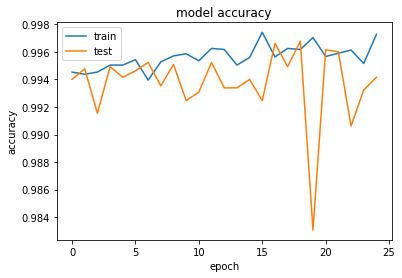

In [22]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


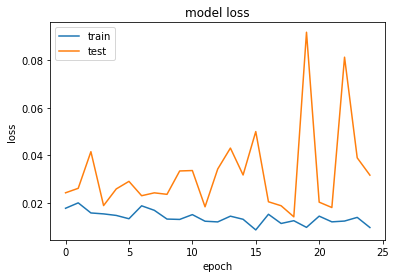

In [23]:

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
